# 01. Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import New Merged Dataframe

In [3]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/05-2023 Instacart Basket Analysis'

In [4]:
# Import Orders Products Customers Dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [5]:
ords_prods_cust.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2         907        Premium Sliced Bacon       106             12    20.0   
3         907        Premium Sliced Bacon       106             12    20.0   
4        1000                    Apricots        18             10    12.9   

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   3139998      138            28                   6                 11   
1   1977647      138            30                   6                 17   
2   3160996      138             1                   5                 13   
3   2254091      138            10                   5                 14   
4    505689      138             9                   6                 12   

   ...  frequent_user_flag  First Name  Last Name Gender      STATE Age  \
0  ...   Frequent customer     Charles        Cox   Male  Minnesota  81   
1  ...   Frequent customer     Charles        Cox   Male  Minnesota  81   
2  ...   Frequent customer     Charles        Cox   Male  Minnesota  81   
3  ...   Frequent customer     Charles        Cox   Male  Minnesota  81   
4  ...   Frequent customer     Charles        Cox   Male  Minnesota  81   

  date_joined n_dependants marriage_status  income  
0    8/1/2019            1         married   49620  
1    8/1/2019            1         married   49620  
2    8/1/2019            1         married   49620  
3    8/1/2019            1         married   49620  
4    8/1/2019            1         married   49620  

[5 rows x 34 columns]

# 03. Visualizations

## Bar Chart

<Axes: >

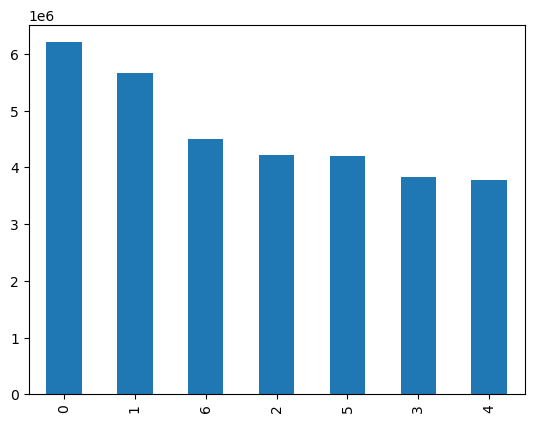

In [5]:
# Creating a Bar Chart for 'orders_day_of_week' column
ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

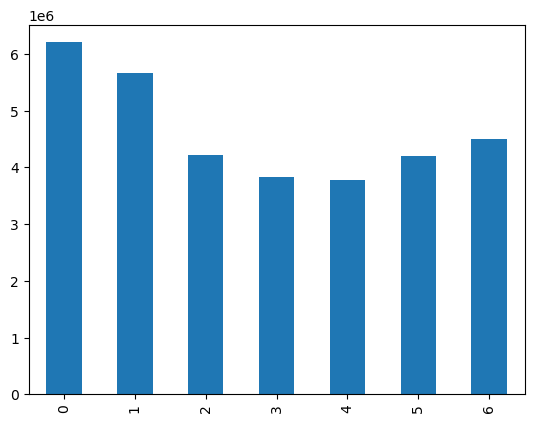

In [7]:
bar = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

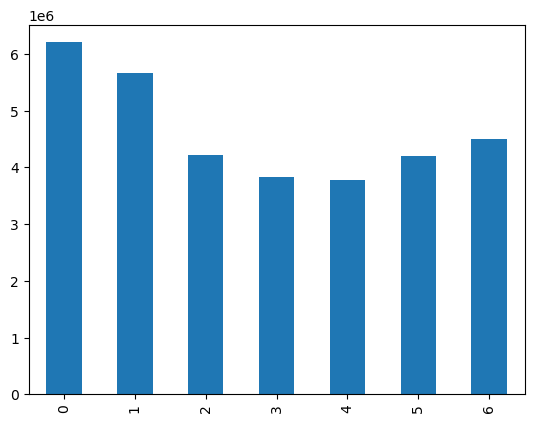

In [8]:
bar.figure

In [9]:
# Export Chart as Image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_of_week.png'))

## Histogram

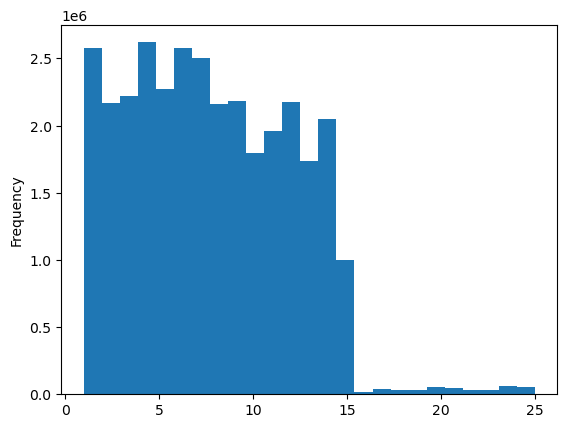

In [11]:
# Create a histogram for the 'prices' column
hist = ords_prods_cust['prices'].plot.hist(bins = 25)

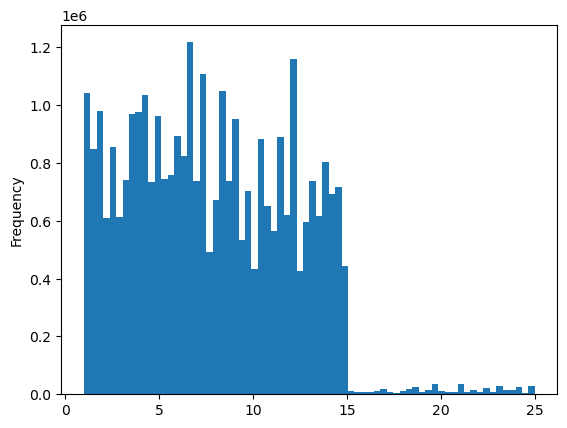

In [13]:
# Change the histogram to bins = 70
hist = ords_prods_cust['prices'].plot.hist(bins = 70)

In [14]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

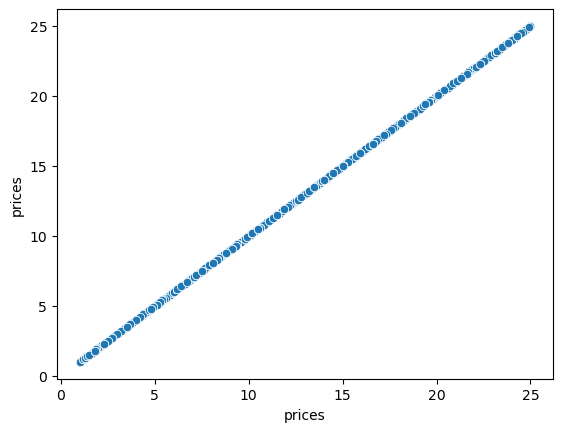

In [15]:
# Create a scatterplot for 'prices' column
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

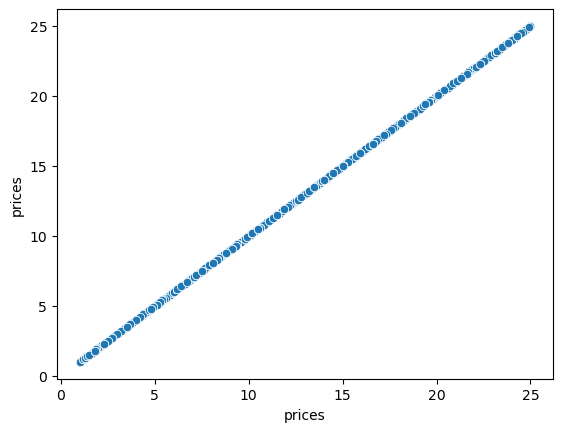

In [21]:
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

In [22]:
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

## Line Chart

### Create a Sample

In [6]:
np.random.seed(4)

In [8]:
# Create a List of True/False Values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
# Store 70% of the Sample in the Dataframe big
big = ords_prods_cust[dev]

In [12]:
# Store 30% of the Sample in the Dataframe small
small = ords_prods_cust[~dev]

In [13]:
len(ords_prods_cust)

32404854

In [14]:
len(big) + len(small)

32404854

In [15]:
df_2 = small[['orders_day_of_week', 'prices']]

In [16]:
df_2

orders_day_of_week  prices
0                          6     5.8
2                          5    20.0
3                          5    20.0
6                          5     4.4
10                         0    12.8
...                      ...     ...
32404841                   1     1.8
32404842                   2     1.8
32404843                   4     1.8
32404849                   3     1.8
32404850                   1     7.5

[9721098 rows x 2 columns]

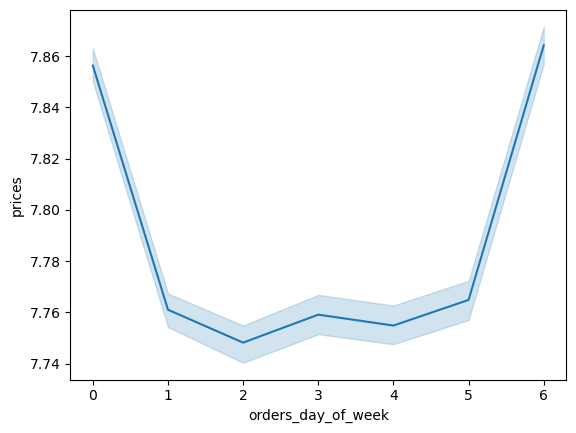

In [17]:
# Create Chart Using Sample
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [20]:
# Export Line Chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_day_of_week.png'))

# Hour of Day Visualization

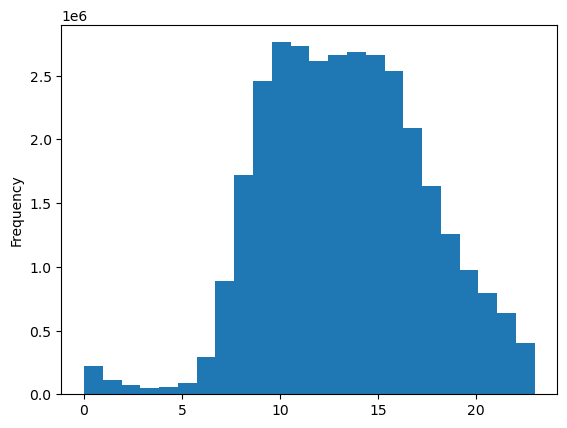

In [23]:
# Create a histogram for 'order_hour_of_day' column
hist_hour_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

### This histogram shows that early in the day (until 6:00) there are very few orders placed. The peak part of the day is from around 9:00 until 16:00. Orders decrease as the day goes on after 16:00.

In [24]:
# Export histogram
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

# Loyalty Bar Chart

In [25]:
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_prior_order',
       'frequent_user_flag', 'First Name', 'Last Name', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'marriage_status', 'income'],
      dtype='object')

<Axes: >

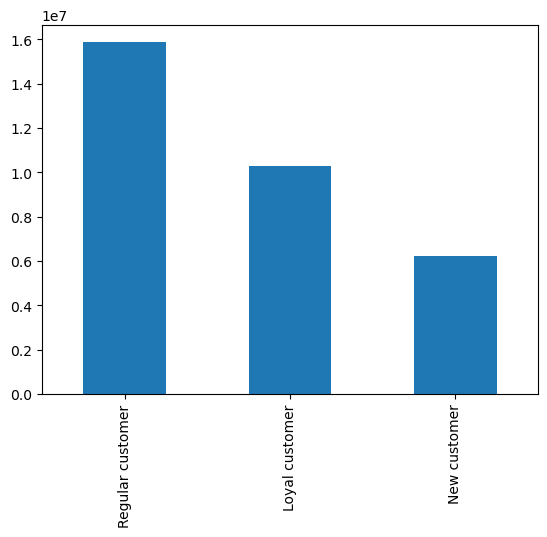

In [26]:
# Create a bar chart for the loyalty flag
ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

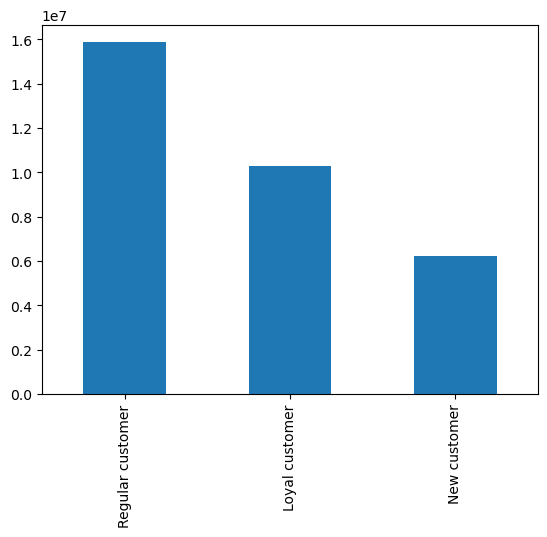

In [32]:
chart_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [33]:
# Export bar chart
chart_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'chart_loyalty.png'))

# Line Chart for Prices by Hour of Day

In [28]:
df_3 = small[['order_hour_of_day', 'prices']]

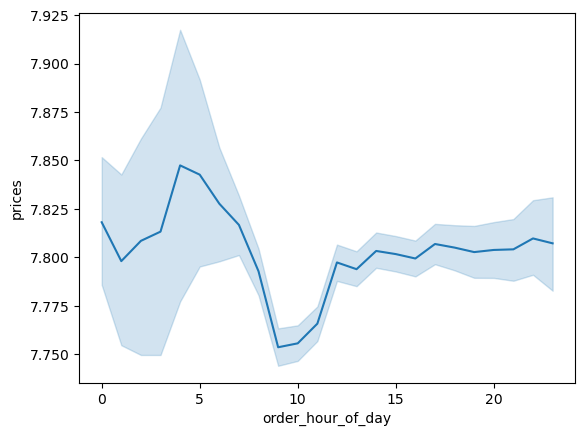

In [29]:
# Create a line chart for prices by hour of day
line_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [34]:
# Export Chart
line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))

# Line Chart for Customer Demographics

In [30]:
df_4 = small[['Age', 'n_dependants']]

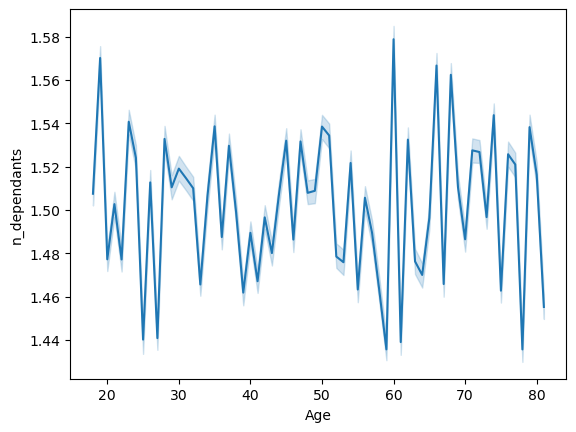

In [31]:
# Create a line chart for dependents by age
line_dependents = sns.lineplot(data = df_4, x = 'Age', y = 'n_dependants')

### This line chart tells us that there is little correlation between age and number of dependents. However, the age with the least dependents is about 59 and 78, and the age with the most is about 60.

In [35]:
# Export chart
line_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents.png'))

# Scatterplot for Age/Income

<Axes: xlabel='Age', ylabel='income'>

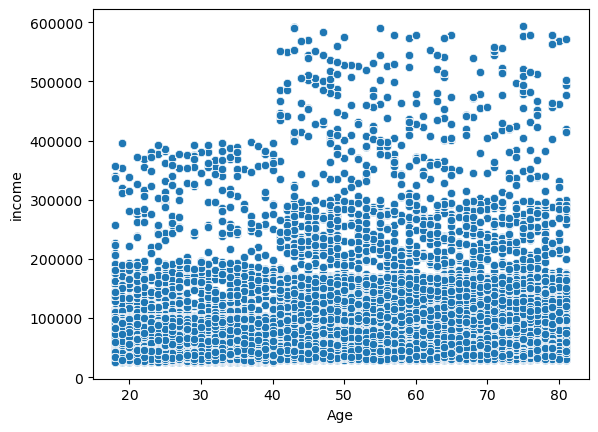

In [36]:
# Create a scatterplot for age and income
sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)

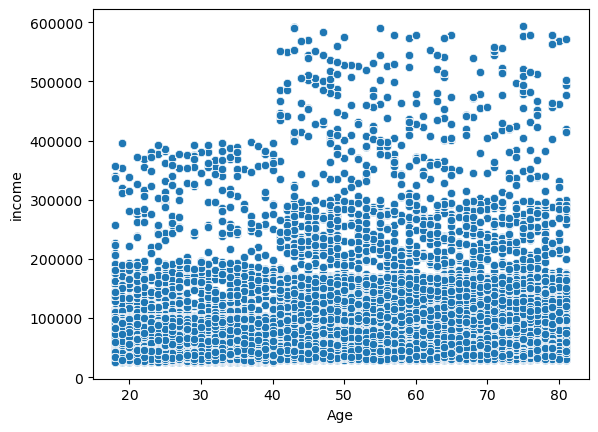

In [37]:
scatter_income = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)

### This scatterplot shows that there is little to no correlation between Age and income.

In [38]:
# Export scatterplot
scatter_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income.png'))